In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

In [2]:
import sys

In [3]:
sys.executable

'/usr/local/opt/python@3.9/bin/python3.9'

In [8]:
# !pip3 install opencv-python-headless mplcursors --upgrade

In [9]:
# sourced from HGPS/align.py

In [15]:
all_cells = [1,2,4,5,6,7,8] # range(1,7+1)

<Figure size 1152x576 with 0 Axes>

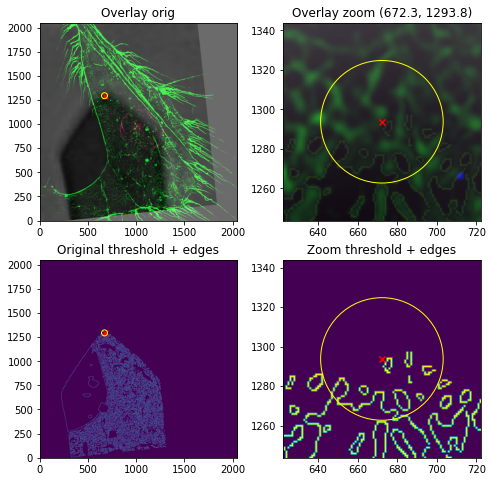

[]


In [36]:
base_folder = 'datasets/SR_HGPS1/'
coord_folder = os.path.join(base_folder, 'HGPS AFM Coordinate Overlays')

# fname_overlay_cyto = os.path.join(coord_folder,'HGPS Cell 1 Cyt.png')
# fname_overlay_nuc = os.path.join(coord_folder,'HGPS Cell 1 Nuc.png')
# fname_tip = os.path.join(coord_folder,'tip.png')

view_types = ['Cyt', 'Nuc']
view_type = 0
pointers = []

for cell_n in [2,]:

    fname_overlay_view = os.path.join(coord_folder, 'HGPS Cell %d %s.png' % (cell_n, view_types[view_type]))

    # print('overlay_view', fname_overlay_view)

    # fname_tip = os.path.join(coord_folder, 'tip.png')

    img1_orig = cv2.imread(fname_overlay_view)

    # print('path:', fname_overlay_view)

    img1 = cv2.cvtColor(img1_orig, cv2.COLOR_BGR2GRAY)

    # img1 = cv2.Canny(img1,10,20,100)
    # img2 = cv2.Canny(img2,50,100)

    fig = plt.figure(figsize=(16, 8))

    centered_all = [
        [
            [None, None, None],
            [477.71818181, 1431.93571429, 60.],
            [672.2564935, 1293.75, 60.],
            [None, None, None],
            [710.87532468, 1661.81428572, 60.],
            [1286.89935065, 1035.89285714, 60.],
            [1258.5064935, 600., 60.],
            [1608.86363636, 1054.10714285, 60.],
            [1163.32792208, 1766.60714286, 60.]

        ],

        [
            [None, None, None],
            [1218.00324675, 926.60714286, 60.],
            [1055.32467532, 940.17857143, 60.],
            [None, None, None],
            [1017.11038961, 956.60714286, 60.],
            [1025.68181818, 1693.75, 120.],
            [997.82467532, 1144.28571429, 80.],
            [781.75324675, 979.28571429, 60.],
            [753.18181818, 753.21428571, 60.],
         ]
    ]

    np.save(os.path.join(coord_folder, 'centered_all.npy'), centered_all)

    # print('Selecting cell_n:', view_type, cell_n, centered_all[view_type][cell_n])
    centered = centered_all[view_type][cell_n]

    t = (centered[0] - 300, centered[0] + 300, centered[1] - 300, centered[1] + 300)
    # t = (400,1100,1600, 1100)
    # t = (700,850, 1300, 1200)

    # plt.xlim(t[0],t[1])
    # plt.ylim(t[2],t[3])
    # plt.scatter(centered[0], centered[1], marker='x', color='red')


    if True:
        thresh_val = centered[2]

        # top left
        fig, ax = plt.subplots(2, 2, figsize=(8, 8))

        circle1 = plt.Circle((centered[0], centered[1]), radius=31, color='yellow', alpha=1, fill=False)
        ax[0][0].add_patch(circle1)

        ax[0][0].imshow(img1_orig, origin='lower')
        ax[0][0].set_title('Overlay orig')
        ax[0][0].scatter(centered[0], centered[1], marker='x', color='red')
        

        # top right
        circle2 = plt.Circle((centered[0], centered[1]), radius=31, color='yellow', alpha=1, fill=False)
        ax[0][1].add_patch(circle2)

        ax[0][1].imshow(img1_orig, origin='lower')
        ax[0][1].set_xlim(centered[0] - 50, centered[0] + 50)
        ax[0][1].set_ylim(centered[1] - 50, centered[1] + 50)
        ax[0][1].scatter(centered[0], centered[1], marker='x', color='red')

        ax[0][1].set_title('Overlay zoom (%0.1f, %0.1f)' % (centered[0], centered[1]))

        # bottom left

        threshfactor = 2.0  # 1.75 # 1.0
        channel_finder = 1  # 0

        img1 = img1_orig[:, :, channel_finder]  # ::2
        #  ['BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'][0]
        img1 = cv2.threshold(img1, thresh_val / threshfactor, 256, cv2.THRESH_BINARY)[1]
        img1 = cv2.Canny(img1, 10, 20)  # 10, 20

        circle3 = plt.Circle((centered[0], centered[1]), radius=31, color='yellow', alpha=1, fill=False)
        ax[1][0].add_patch(circle3)
        ax[1][0].scatter(centered[0], centered[1], marker='x', color='red')
        ax[1][0].imshow(img1, origin='lower')

        ax[1][0].set_title('Original threshold + edges')

        # bottom right
        
        circle4 = plt.Circle((centered[0], centered[1]), radius=31, color='yellow', alpha=1, fill=False)
        ax[1][1].add_patch(circle4)

        ax[1][1].imshow(img1)
        ax[1][1].set_xlim(centered[0] - 50, centered[0] + 50)
        ax[1][1].set_ylim(centered[1] - 50, centered[1] + 50)
        ax[1][1].scatter(centered[0], centered[1], marker='x', color='red')

        ax[1][1].set_title('Zoom threshold + edges')

        # overlay to top right
        ax[0][1].imshow(img1, alpha=0.1)

        fig.savefig(os.path.join(coord_folder, 'Cell %d %s.composite_circle_D2um.png' % (cell_n, view_types[view_type])),
                    bbox_inches='tight')

        # plt.ion()
        cursor = mplcursors.cursor()
        cursor.connect("add", lambda sel: pointers.append(np.concatenate([sel.target, [centered[2],]])))

        # plt.clf()

        # plt.imshow(img1_orig, origin='lower')
        plt.show()

        # plt.draw()
        # plt.pause(0.001)
        # input("Press [enter] to continue.")
#     print('most recent pointer:', pointers[-1])
    break

print(np.array2string(np.array(pointers), separator=', '))

In [31]:
import contour
SCALING_JSON = os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/annotation', 'new_scaling.json')
sf = contour.get_scaling_factor(open(SCALING_JSON))

[[ 164.75342466   93.30136986]
 [ 164.75342466 1001.52054795]
 [1074.34246575 1000.15068493]
 [1072.97260274   93.30136986]]
[908.2191780821918, 909.5900726186593, 906.8503497076416] 0.44346673183731977
sf 0.44346673183731977
